#### This exercise to find out how much Gas I need to travel for 1900 miles based on my previous travel history using Linear Regression Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
travel_data=pd.read_csv('Travel_data.csv')
travel_data.head()
#travel_data.shape

,Miles,gas Paid
0,390.0,36.66
1,403.0,37.05
2,396.0,34.71
3,383.0,32.50
4,321.1,32.63


I have history of travel history that how much Miles I travelled and how much I paid for Gas consumed by my car

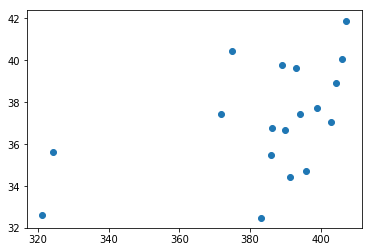

In [3]:
#disply graph on travel data
plt.scatter(travel_data['Miles'],travel_data['gas Paid'])


Lets do some deep understanding for Linear regression Algorithm.
Linear Regression is used for continous/numeric of data where predicting Depedent value based on Independent Value

In above example Miles (X) is Independent variable and based on Miles predict the Dependent value of Price of Gas (Y)

* Simple Linear Regression: Predict dependent variable using single Independent Variable
* Multiple Linear Regression: Predict dependent variable using more than one Independent Variable
    
Mathematical formula for Linear Regression is: <br>
y = mx+ c  <br>
m = (xi-x)(yi-y)/(xi-x)**2  <br>
m is slope and c is intercept


* Multiple Linear Regresion:
y = c + m1x1 + m2x2 + ... + mixi

In [4]:
#Lets try to use above formula and predict value
travel=travel_data.copy()
x_mean = travel['Miles'].mean()
y_mean =travel['gas Paid'].mean()
print('x_mean & y_mean : ',x_mean,y_mean)


#calculate (xi-x), (yi-y) ,(xi-x)**2
travel['xi-x']=round(travel['Miles']-x_mean)
travel['yi-y']=round(travel['gas Paid']-y_mean)
travel['(xi-x)**2']=np.square(travel['xi-x'])
travel['(xi-x)(yi-y)']=travel['xi-x']*travel['yi-y']
travel

#caculate m using (xi-x)(yi-y)/(xi-x)**2
m= sum(travel['(xi-x)(yi-y)'])/sum(travel['(xi-x)**2'])
print('m :', m)

# y=mx+c is c = y-mx
c= y_mean-(m*x_mean)
print('c : ',c)

travel['predicted'] = m*travel['Miles']+c
travel

#sum(travel['xi-x']*travel['yi-y'])/sum(travel['(xi-x)**2'])


x_mean & y_mean :  384.45555555555563 37.18111111111111
m : 0.06069448497227896
c :  13.846779171935278


,Miles,gas Paid,xi-x,yi-y,(xi-x)**2,(xi-x)(yi-y),predicted
0,390.0,36.66,6.0,-1.0,36.0,-6.0,37.517628
1,403.0,37.05,19.0,-0.0,361.0,-0.0,38.306657
2,396.0,34.71,12.0,-2.0,144.0,-24.0,37.881795
3,383.0,32.50,-1.0,-5.0,1.0,5.0,37.092767
4,321.1,32.63,-63.0,-5.0,3969.0,315.0,33.335778
5,391.3,34.45,7.0,-3.0,49.0,-21.0,37.596531
6,386.1,36.79,2.0,-0.0,4.0,-0.0,37.280920
7,371.8,37.44,-13.0,0.0,169.0,-0.0,36.412989
8,404.3,38.90,20.0,2.0,400.0,40.0,38.385559
9,393.0,39.66,9.0,2.0,81.0,18.0,37.699712


In [5]:
# for 1900 miles how much i have to paid on gas
m*1900+c


129.1663006192653

#### Conclusion: I have to paid $130 to travel 1900 miles

### let's predict with Linear regression algorith from sklearn

In [6]:
split_idx=int(len(travel_data)*0.7)
#train
train=travel_data.iloc[0:split_idx].copy()
print(train.shape)

#test
test=travel_data.iloc[split_idx:].copy()
print(test.shape)

(12, 2)
(6, 2)


In [7]:
#fit and predict model
lr=LinearRegression()
lr.fit(train[['Miles']],train['gas Paid'])
test['prediction']=lr.predict(test[['Miles']])

test

,Miles,gas Paid,prediction
12,386.0,35.50,36.476395
13,324.1,35.63,32.382830
14,394.3,37.45,37.025290
15,389.1,39.79,36.681404
16,374.8,40.44,35.735718
17,407.3,41.90,37.885004


In [8]:
test2=test[['Miles','gas Paid']].copy()
test2

,Miles,gas Paid
12,386.0,35.50
13,324.1,35.63
14,394.3,37.45
15,389.1,39.79
16,374.8,40.44
17,407.3,41.90


In [9]:
test2=test2.append({'Miles':1900 },ignore_index=True)
test2

,Miles,gas Paid
0,386.0,35.50
1,324.1,35.63
2,394.3,37.45
3,389.1,39.79
4,374.8,40.44
5,407.3,41.90
6,1900.0,NaN


In [10]:
test2['prediction']=lr.predict(test2[['Miles']])
test2

,Miles,gas Paid,prediction
0,386.0,35.50,36.476395
1,324.1,35.63,32.382830
2,394.3,37.45,37.025290
3,389.1,39.79,36.681404
4,374.8,40.44,35.735718
5,407.3,41.90,37.885004
6,1900.0,NaN,136.600098


#### Conclusion: I have to paid $137 to travel 1900 miles

lets try to find outliers and reduce actual and predicted difference

Text(0,0.5,'Gas')

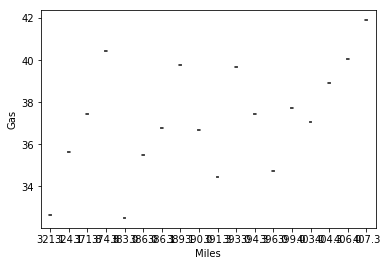

In [11]:
import seaborn as sns
sns.boxplot(x='Miles',y='gas Paid',data=travel_data,width=0.1)
plt.xlabel('Miles')
plt.ylabel('Gas')

Gas consumstion on 383 miles can be outlier so lets try to remove these value and predict again

In [12]:
travel_data_new=travel_data.copy()
travel_data_new

,Miles,gas Paid
0,390.0,36.66
1,403.0,37.05
2,396.0,34.71
3,383.0,32.50
4,321.1,32.63
5,391.3,34.45
6,386.1,36.79
7,371.8,37.44
8,404.3,38.90
9,393.0,39.66


In [13]:
travel_data_new=travel_data_new.drop(3)
#travel_data_new=travel_data_new.drop(4)


travel_data_new

,Miles,gas Paid
0,390.0,36.66
1,403.0,37.05
2,396.0,34.71
4,321.1,32.63
5,391.3,34.45
6,386.1,36.79
7,371.8,37.44
8,404.3,38.90
9,393.0,39.66
10,406.0,40.05


In [14]:
split_idx=int(len(travel_data)*0.7)

#train
train_new=travel_data_new.iloc[0:split_idx].copy()

#test
test_new=travel_data_new.iloc[split_idx:].copy()


test_new=test_new.append({'Miles':1900 },ignore_index=True)

#fit and predict model
lr_new=LinearRegression()
lr_new.fit(train_new[['Miles']],train_new['gas Paid'])
test_new['prediction']=lr_new.predict(test_new[['Miles']])

test_new

,Miles,gas Paid,prediction
0,324.1,35.63,32.780067
1,394.3,37.45,37.240618
2,389.1,39.79,36.910206
3,374.8,40.44,36.001576
4,407.3,41.90,38.066645
5,1900.0,NaN,132.913698


In [15]:
#remove 324.1 miles data and predict again
travel_data_new=travel_data_new[travel_data_new['Miles']!=324.1]
split_idx=int(len(travel_data)*0.7)

#train
train_new=travel_data_new.iloc[0:split_idx].copy()

#test
test_new=travel_data_new.iloc[split_idx:].copy()


test_new=test_new.append({'Miles':1900 },ignore_index=True)

#fit and predict model
lr_new=LinearRegression()
lr_new.fit(train_new[['Miles']],train_new['gas Paid'])
test_new['prediction']=lr_new.predict(test_new[['Miles']])

test_new


,Miles,gas Paid,prediction
0,394.3,37.45,37.240618
1,389.1,39.79,36.910206
2,374.8,40.44,36.001576
3,407.3,41.90,38.066645
4,1900.0,NaN,132.913698


#### Conclusion: I have to paid $133 to travel 1900 miles after removing some outlier